# Questionnaire Spatial Strategies FRS


## Import packages 

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import ptitprince as pt
from statsmodels.stats.anova import *

In [2]:
# Data set loading
df_file = "/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/FRS/FRS.csv"
df = pd.read_csv(df_file, sep= ',')
df.describe()

,ID,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,...,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Alter
count,30.000000,31.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,30.000000
mean,5722.966667,4.838710,4.093750,3.750000,4.062500,4.43750,2.500000,3.812500,4.343750,3.156250,...,4.375000,4.562500,4.406250,4.250000,4.593750,4.406250,2.406250,3.906250,3.531250,25.933333
std,2893.110633,1.551274,1.653137,1.778002,1.605183,1.66438,1.436842,1.803894,1.578267,1.667708,...,1.699146,1.479701,1.387952,1.545023,1.477997,1.662865,1.562863,1.376282,1.565441,8.764872
min,365.000000,2.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000
25%,3375.500000,3.500000,2.750000,2.000000,3.000000,3.00000,1.000000,3.000000,3.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.750000,3.000000,1.000000,3.000000,2.000000,21.000000
50%,5636.000000,6.000000,4.000000,3.000000,4.000000,5.00000,2.000000,3.500000,5.000000,3.000000,...,4.500000,5.000000,5.000000,4.500000,5.000000,5.000000,2.000000,4.000000,3.000000,23.000000
75%,8353.500000,6.000000,5.250000,5.000000,5.000000,6.00000,4.000000,5.000000,5.250000,4.000000,...,6.000000,5.250000,5.250000,6.000000,6.000000,6.000000,3.000000,5.000000,4.250000,25.000000
max,9601.000000,7.000000,7.000000,7.000000,7.000000,7.00000,6.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,55.000000


## „Globale Einschätzung der Orientierungsfähigkeit mit Richtungs- und Wegstrategie“

In [3]:
df["Global"] = df[["Item1", "Item4", "Item5", "Item8", "Item10", "Item12", "Item13", "Item14", "Item15",
"Item18"]].mean(axis=1)
df["Global"].describe()
Global = df[["Item1", "Item4", "Item5", "Item8", "Item10", "Item12", "Item13", "Item14", "Item15","Item18"]]
pg.cronbach_alpha(data=Global, ci=.99)

(0.9065234705661064, array([0.826, 0.957]))

## „Verwendung einer Überblicksstrategie“

In [4]:
df["Overview"] = df[["Item2", "Item3", "Item7", "Item9", "Item11", "Item16", "Item19"]].mean(axis=1)
Overview = df[["Item2", "Item3", "Item7", "Item9", "Item11", "Item16", "Item19"]]
pg.cronbach_alpha(data=Overview, ci=.99)

(0.91400755594304, array([0.837, 0.961]))

## „Kenntnis der Himmelsrichtungen“

In [5]:
df["Cardinal"] = df[["Item6", "Item17"]].mean(axis=1)
Cardinal = df[["Item6", "Item17"]]
pg.cronbach_alpha(data=Cardinal, ci=.99)


(0.8391535765286251, array([0.584, 0.938]))

In [6]:
df1 = df.iloc[:, [2,22,24,25,26]].copy()
FRSsubs= df1.dropna()
FRSsubs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        30 non-null     float64
 1   Alter     30 non-null     float64
 2   Global    30 non-null     float64
 3   Overview  30 non-null     float64
 4   Cardinal  30 non-null     float64
dtypes: float64(5)
memory usage: 1.4 KB


In [7]:
FRSsubsLong = pd.melt(FRSsubs, id_vars=['ID'], value_vars=["Global", "Overview", "Cardinal"], var_name='Subscale', value_name='Average')
FRSsubsLong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        90 non-null     float64
 1   Subscale  90 non-null     object 
 2   Average   90 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


## Export File to CSV

In [8]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
FRSsubs.to_csv('FRSsubs.csv')

## Plotting

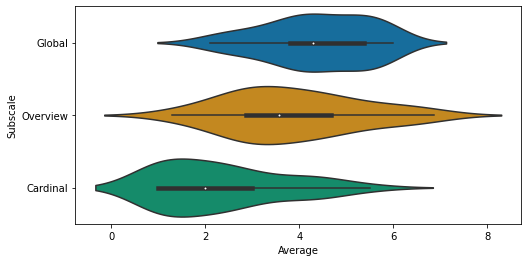

In [9]:
dy="Subscale"; dx="Average"; ort="H"; pal = sns.color_palette("Set2"); sigma = .2
sns.set_palette('colorblind')
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.violinplot(data= FRSsubsLong, x=dx, y=dy, scale="width")
plt.show()

<Figure size 864x576 with 0 Axes>

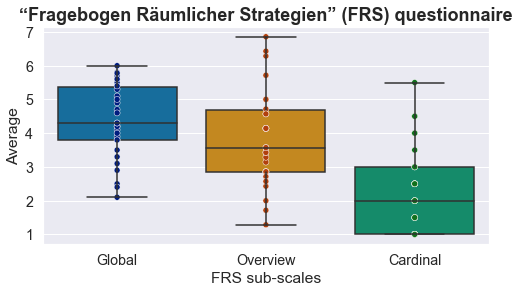

In [10]:
dy="Subscale"; dx="Average"; ort="H";  sigma = .2
sns.set_palette("colorblind")
sns.set_style("white")
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)
plt.tight_layout()
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.boxplot(data= FRSsubsLong, y=dx, x=dy, palette='colorblind').set( xlabel='FRS sub-scales')
sns.scatterplot(data= FRSsubsLong, y=dx, x=dy, hue=dy, palette='dark', legend=False)
plt.title('“Fragebogen Räumlicher Strategien” (FRS) questionnaire', weight='bold').set_fontsize('18')
plt.show()

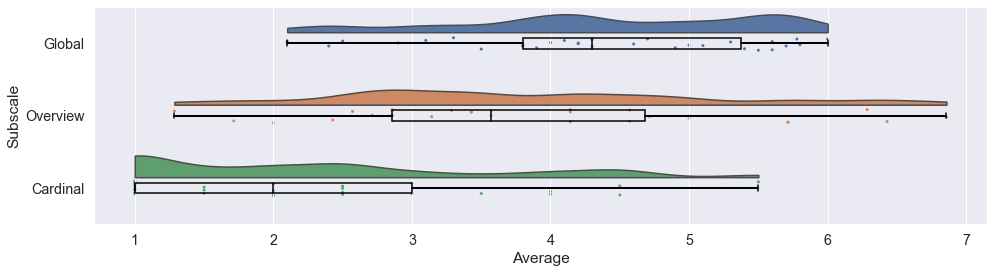

In [11]:

dy="Subscale"; dx="Average"; ort="h"; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(16, 4))

ax=pt.half_violinplot( x = dx, y = dy, data =
FRSsubsLong, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = FRSsubsLong, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = FRSsubsLong, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort) 